In [8]:
%matplotlib inline

# Get ahold of some imports

import sys
import os
import re 
import numpy as np
import importlib
from matplotlib import cm, colormaps
import matplotlib.pyplot as plt

# import modules from /code/
# Add the relative path to the 'code' directory
sys.path.append("../../code/")
import utils
from final import filter_markdown_files, parse_markdown, convert_f_to_k
from final import rotate_to_x_axis, resample_df_to_2n_segments
from final import apply_fft, apply_ifft


In [2]:
# Print out the markdown files

# But first, where in the world are we?
print(os.getcwd())    # Print current working directory

# Our data is in /avgagliardo/data/, can we list out the markdown files?
data_dir = "../../data/AVG002_gps_sine_walk/experimental_data"
filter_str = "AVG002_gps_sine_walk"

# Get the list of markdown files for our experimental data
sorted_files = filter_markdown_files(data_dir, filter_str)

# print them cleanly
print("\nMarkdown Files")
print(15*"-")
for trial, fname in enumerate(sorted_files):
    md = parse_markdown(data_dir+'/'+fname, 'Temperature')
    # print(md)
    print(f"Trial #{trial}: {fname}")
    
    




C:\Users\thean\schoolspace\phy410\exams\final-branches\CP1-24-final\avgagliardo\documentation\final_docs

Markdown Files
---------------
Trial #0: AVG002_gps_sine_walk_0.md
Trial #1: AVG002_gps_sine_walk_1.md
Trial #2: AVG002_gps_sine_walk_2.md
Trial #3: AVG002_gps_sine_walk_3.md
Trial #4: AVG002_gps_sine_walk_4.md
Trial #5: AVG002_gps_sine_walk_5.md
Trial #6: AVG002_gps_sine_walk_6.md
Trial #7: AVG002_gps_sine_walk_7.md
Trial #8: AVG002_gps_sine_walk_8.md
Trial #9: AVG002_gps_sine_walk_9.md
Trial #10: AVG002_gps_sine_walk_10.md
Trial #11: AVG002_gps_sine_walk_11.md


In [3]:
# Now we are going to want to plot them all at once

def plot_multiple_datasets(data_list,
                           title="Multiple Datasets Plot",
                           xlabel="X-Displacement (meters)",
                           ylabel="Y-Displacement (meters)",
                           plot_fit=False,
                           legend_label="Experiment #",
                           alpha=0.55,
                           scatter_size=15):
    """
    Plot multiple datasets from a list of dictionaries, display temperatures, and preserve the legend.

    Args:
        data_list (list): A list of dictionaries, each with keys 'x', 'y', and optionally 'Fitted Sine'.
        title (str): Title of the plot.
        xlabel (str): Label for the x-axis.
        ylabel (str): Label for the y-axis.
        plot_fit (bool): Whether to plot the fitted curve.
        legend_label (str): Base label for the legend.
        alpha (float): Transparency for the scatter points.
        scatter_size (int): Size of the scatter points.
    """
    fig, ax = plt.subplots(figsize=(15, 9))

    # Generate linearly spaced colors
    colormap = colormaps['plasma']
    num_datasets = len(data_list)
    colors = [colormap(i / (num_datasets - 1)) for i in range(num_datasets)]

    # Adjust margins for text on the left and the legend on the right
    plt.subplots_adjust(left=0.3, right=0.8)

    # Build the temperature text to display on the left
    temp_text_lines = []

    # Plot all data and preserve legend entries
    legend_entries = []
    for i, dataset in enumerate(data_list):
        x = dataset.get('x')
        y = dataset.get('y')
        fit = dataset.get('Fitted Sine')
        label = dataset.get('label', f"{legend_label} {i+1}")

        # Mock temperature data extraction (replace this with actual function)
        md_name = f"../../data/AVG002_gps_sine_walk/experimental_data/AVG002_gps_sine_walk_{i}.md"
        md_temp = parse_markdown(md_name, "Temperature")
        temp_k = convert_f_to_k(md_temp)
        temp_k_str = f"{temp_k:.2f} K"
        temp_text_lines.append(f"Trial {i+1}: {temp_k_str}")

        if x is None or y is None:
            raise ValueError(f"Dataset {i+1} must contain 'x' and 'y' keys with NumPy arrays.")

        color = colors[i]

        # Scatter plot
        scatter = ax.scatter(x, y, color=color, alpha=alpha, s=scatter_size, label=label)
        legend_entries.append(scatter)

        # Plot the fitted curve if requested
        if plot_fit and fit is not None:
            fit_label = f"Fitted Curve {i+1}"
            line, = ax.plot(x, fit, linestyle="--", color=color, label=fit_label)
            legend_entries.append(line)

    # Center the temperature text vertically on the left side
    y_step = 0.05  # Vertical spacing for each line of text
    start_y = 0.5 + (len(temp_text_lines) / 2) * y_step  # Start at center and adjust for number of lines
    
    # Display the temperature text on the left
    for i, line in enumerate(temp_text_lines):
        y_pos = start_y - i * y_step  # Adjust vertical position
        plt.text(-0.25, y_pos, line, fontsize=8, transform=ax.transAxes, va="center")

    # Add the legend outside the plot on the right
    ax.legend(handles=legend_entries, loc="center left", bbox_to_anchor=(1.02, 0.5), fontsize=10, title="Legend")

    # Set title, labels, and grid
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.grid(True)

    plt.show()


    




12


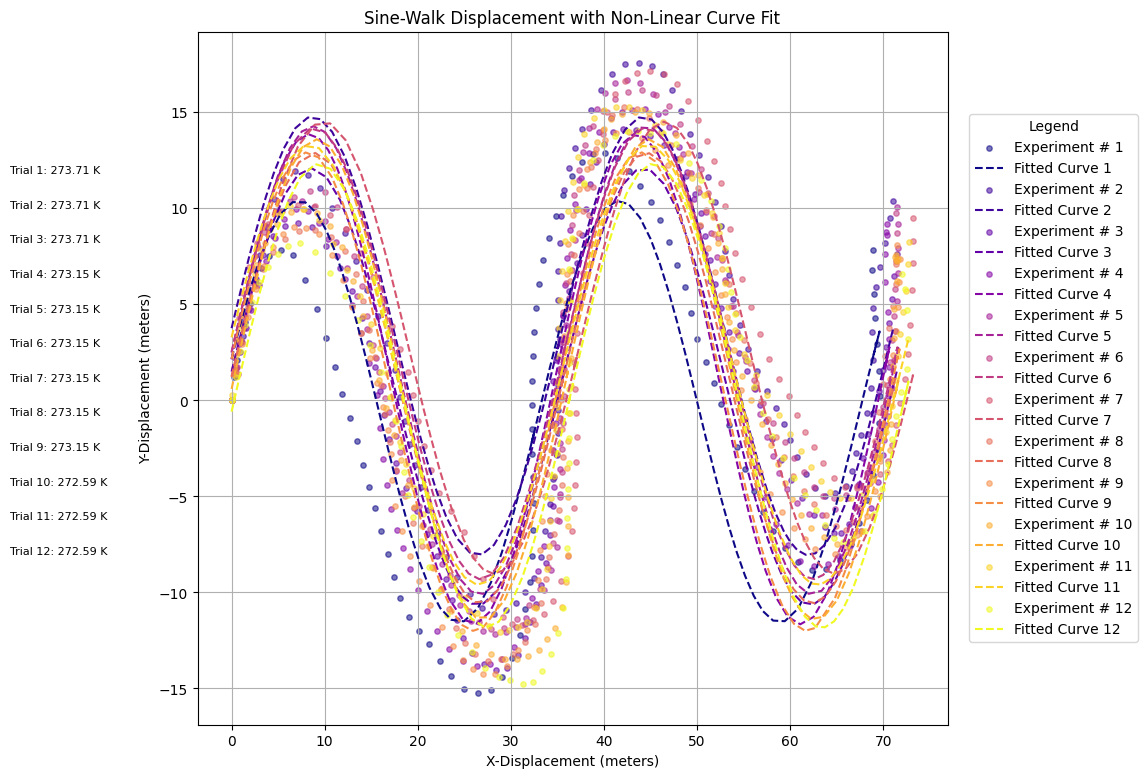

In [4]:
# LOAD AND PLOT A BUNCH OF DATA FRAMES AT ONCE

# Our data is in /avgagliardo/data/, can we list out the markdown files?
data_dir = "../../data/AVG002_gps_sine_walk/experimental_data"
filter_str = "AVG002_gps_sine_walk"

# Get the list of markdown files for our experimental data
sorted_files = filter_markdown_files(data_dir, filter_str)


# create a list for all our data frames
dfs = []
# number of points to resample
n = 6

for fname in sorted_files:
    fname  = fname.split('.')[0]
    df_pre = utils.import_csv("../../data/AVG002_gps_sine_walk/experimental_data/" + fname + ".csv")
    clean_rf = df_pre.iloc[4:, :3 ].reset_index(drop=True)
    # print(clean_rf)
    resampled_rf = resample_df_to_2n_segments(clean_rf, n)
    #print(resampled_rf)
    rot_rf = rotate_to_x_axis(clean_rf, resample=False, n=6, fit_curve=True)
    # print(rot_rf)
    # Create DataFrame
    dfs.append(rot_rf)


print(len(dfs))



title="Sine-Walk Displacement with Non-Linear Curve Fit"
xlabel="X-Displacement (meters)"
ylabel="Y-Displacement (meters)"
plot_fit = True
legend_label="Experiment #"

plot_multiple_datasets(dfs, title, xlabel, ylabel, plot_fit, legend_label)

# check if the raw frame has been loaded
# rf = test_raw_dataframe

# prune off the first few frames since they can be noisy

# rotated_data = rotate_to_x_axis(clean_rf)


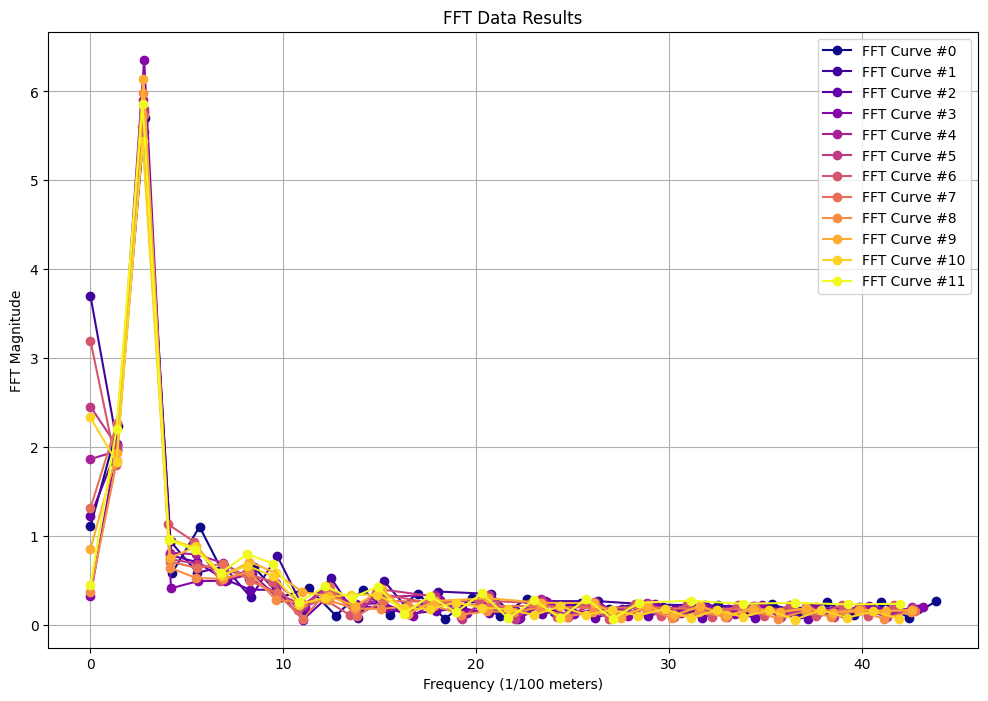

In [5]:
#Apply the FFT to the whole dataset, and plot
def process_and_plot_ffts(dataframes, threshold=0.01, title="FFT Data Results", xlabel="Frequency (1/100 meters)", ylabel="FFT Magnitude"):
    """
    Apply FFT to a list of DataFrames and plot all the resulting FFT magnitudes on the same graph,
    with rescaled y-axis and omission of insignificant x-axis tail.

    Args:
        dataframes (list): List of pandas DataFrames with 'x' and 'y' columns.
        threshold (float): Fraction of the max magnitude below which frequencies are considered insignificant.
        title (str): Title of the plot.
        xlabel (str): Label for the x-axis.
        ylabel (str): Label for the y-axis.
    """
    n = 6  # Number of segments as 2^n
    plt.figure(figsize=(12, 8))

    # Generate linearly spaced colors
    colormap = colormaps['plasma']
    num_datasets = len(dataframes)
    colors = [colormap(i / (num_datasets - 1)) for i in range(num_datasets)]

    for i, data in enumerate(dataframes):
        # Resample the DataFrame
        data = resample_df_to_2n_segments(data, n)
        
        # Apply FFT
        frequencies, fft_values = apply_fft(data)

        # Update color
        color = colors[i]
        
        # Calculate magnitudes
        magnitudes = np.abs(fft_values)
        positive_frequencies = np.array(frequencies[:len(frequencies)//2])
        positive_magnitudes = np.array(magnitudes[:len(magnitudes)//2])

        # Determine cutoff where magnitudes are significant
        max_magnitude = positive_magnitudes.max()
        significant_indices = (positive_magnitudes > (threshold * max_magnitude)).astype(bool)

        # Apply threshold filter
        filtered_frequencies = positive_frequencies[significant_indices]
        filtered_magnitudes = positive_magnitudes[significant_indices]

        # Plot FFT results with markers
        plt.plot(filtered_frequencies, filtered_magnitudes, color=color, marker='o', linestyle='-', label=f"FFT Curve #{i}")

    # Rescale y-axis to logarithmic for better visibility
    # plt.yscale('log')

    # Add plot details
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(loc="upper right")
    plt.grid(True)
    plt.show()





# Example usage
process_and_plot_ffts(dfs)








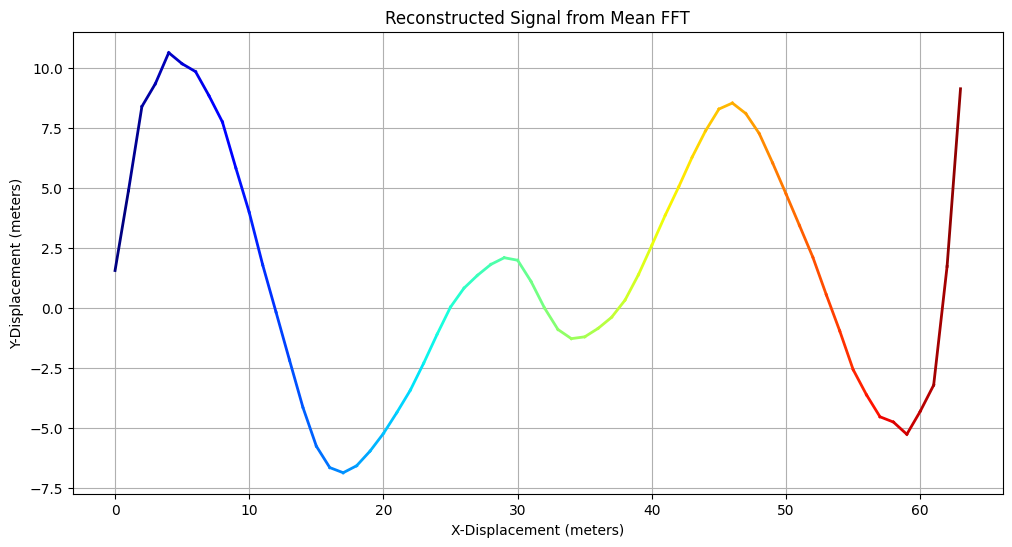

In [6]:
## Take a mean and run the IFFT


def process_and_plot_mean_ifft(dataframes, threshold=0.01, n=6):
    """
    Compute the mean FFT of multiple datasets, apply IFFT, and plot the reconstructed signal
    with a color gradient using the jet colormap.

    Args:
        dataframes (list): List of pandas DataFrames with 'x' and 'y' columns.
        threshold (float): Fraction of the max magnitude below which frequencies are considered insignificant.
        n (int): Number of resampling segments as 2^n.
    """
    fft_values_list = []  # To store FFT values

    for data in dataframes:
        # Resample the DataFrame
        data = resample_df_to_2n_segments(data, n)

        # Apply FFT
        frequencies, fft_values = apply_fft(data)

        # Calculate magnitudes and filter significant FFT values
        magnitudes = np.abs(fft_values)
        positive_fft_values = fft_values[:len(fft_values)//2]

        # Determine significant indices
        max_magnitude = magnitudes[:len(magnitudes)//2].max()
        significant_indices = magnitudes[:len(magnitudes)//2] > (threshold * max_magnitude)

        # Filter and store significant FFT values
        fft_values_list.append(positive_fft_values[significant_indices])

    # Align FFT values by zero-padding and compute the mean FFT
    max_length = max(len(fft) for fft in fft_values_list)
    aligned_fft_values = np.zeros((len(fft_values_list), max_length), dtype=complex)

    for i, fft in enumerate(fft_values_list):
        aligned_fft_values[i, :len(fft)] = fft  # Zero-padding

    mean_fft_values = np.mean(aligned_fft_values, axis=0)

    # Reconstruct signal using IFFT
    mean_fft_full = np.zeros(2 * max_length, dtype=complex)
    mean_fft_full[:max_length] = mean_fft_values
    mean_fft_full[-max_length:] = np.conj(mean_fft_values[::-1])  # Symmetry for real signals

    reconstructed_signal = apply_ifft(mean_fft_full)

    # Plot the reconstructed signal with jet colormap gradient
    plt.figure(figsize=(12, 6))

    # Generate colors using the jet colormap
    colormap = colormaps["jet"]
    num_points = len(reconstructed_signal)
    colors = [colormap(i / (num_points - 1)) for i in range(num_points)]

    # Plot with colors changing along the curve
    for i in range(num_points - 1):
        plt.plot([i, i + 1], [reconstructed_signal[i], reconstructed_signal[i + 1]],
                 color=colors[i], linewidth=2)

    plt.title("Reconstructed Signal from Mean FFT")
    plt.xlabel("X-Displacement (meters)")
    plt.ylabel("Y-Displacement (meters)")
    plt.grid(True)
    plt.show()



################
process_and_plot_mean_ifft(dfs, threshold=0.01)
